<a href="https://colab.research.google.com/github/VladTeapa/Python/blob/master/Lab_4_k_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Invatare nesupervizata - k-Means
In acest laborator se va studia algoritmul de clusterizare k-Means. Algoritmul face parte din categoria tehnicilor nesupervizate de invatare. Aceasta inseamna ca nu este necesara etichetarea datelor de intrare. Scopul algoritmul este sa formeze clustere de date care detin proprietati asemanatoare. In prima parte a laboratorului se va experimenta cu algoritmul la modul general urmand ca in a doua parte algoritmul sa fie aplicat pentru reducerea numarului de culori ale unei imagini. Ultima parte consta in aplicarea algoritmului in recunoasterea cifrelor de mana. Incepem prin a importa librariile necesare.

In [0]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import tensorflow_datasets as tfds
import tensorflow as tf
#tf.enable_eager_execution()
%matplotlib inline

##K-means pentru un set de date aleatoare
In aceasta parte se va genera un set de puncte aleatoare in plan. Ca orice aplicatie a functiilor pseudorandom este necesara o valoare de seed (mai multe in cursul de cripto 😉). Aceasta valoare initiala se seteaza o singura data.

In [0]:
np.random.seed(0)

Pentru a genera un set de puncte aleatoare se va folosi functia *make_blobs* din libraria sklearn. Aceasta librarie implementeaza o varietate mare de algoritmi de machine learning (ML) fiind una dintre cele mai folosite librarii din domeniu. 

Argumentele functiei sunt urmatoarele:


*   **n_samples**: numarul de puncte ce vor fi generate
*   **centers**: coordonatele centroizilor
*   **cluster_std**: variatia standard a punctelor dintr-un cluster
*   **n_features**: dimensiunea spatiului (in acest laborator se va lucra cu dimensiunea 2 \<planul xOy\> si cu dimensiunea 3 \<spatiul culorilor\>)


Cu cat **cluster_std** este mai mare cu atat punctele vor mai indepartate de centroid. 






Functia returneaza doi vectori:


*   **X** - o matrice de dimeninsiuni n_samples x n_features reprezentand coordonatele punctelor 
*   y - un vector de n_samples unde y[i] reprezinta numarul cluster-ului in care a fost asignat punctul i. 



Mai multe detalii [aici](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

In [0]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Se afiseaza punctele generate:

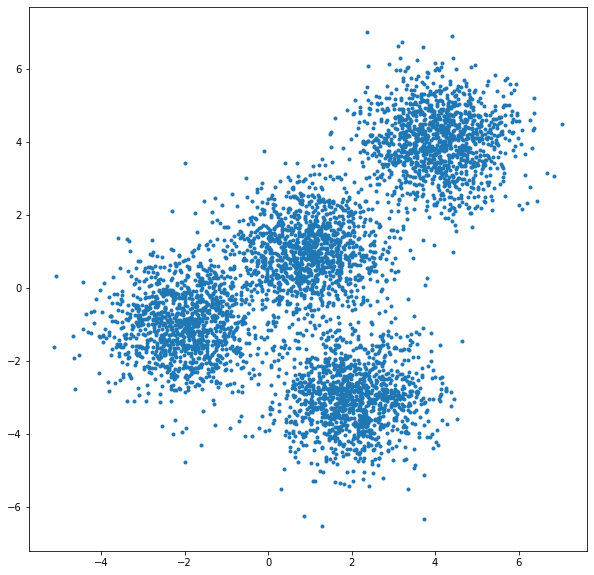

In [11]:
plt.gcf().set_size_inches(10, 10)
plt.scatter(X[:, 0], X[:, 1], marker='.')

Pentru a afisa fiecare cluster intr-o culoare se va specifica argumentul *c* al functie *scatter*. Acest argument reprezinta culoarea fiecarui punct care va fi plotat, culoare data de label-ul fiecarui punct. 

Cum credeti ca se trece de la label la culoare? (laboratorul trecut - maparea unei valori catre o culoare)

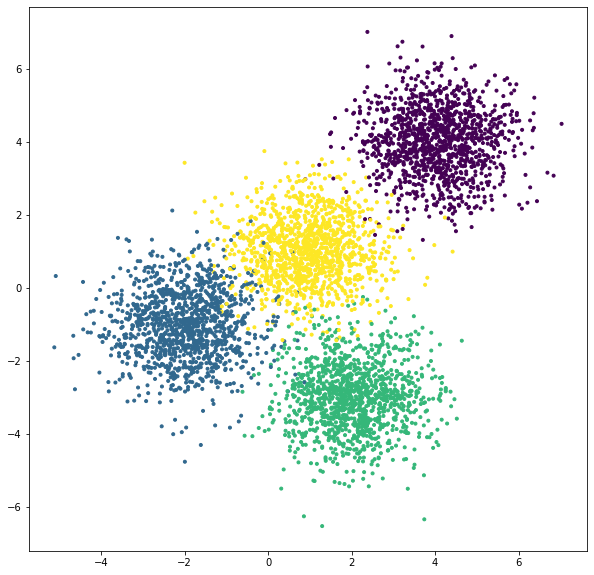

In [12]:
plt.gcf().set_size_inches(10, 10)
plt.scatter(X[:, 0], X[:, 1], marker='.', c=y)

Fiecare algortim de ML din sklearn poate fi instatiat folosind un ***obiect***(anul 2 oop). In cazul algoritmului k-means acest obiect este instanta clasei **KMeans** si primeste la initializare urmatorii parametrii:


*   init: metoda de initializare a centroizilor
          daca centroizii sunt initializati random se va specifica "random"
          daca centroizii sunt initializati in vederea eficientizarii algoritmului se va specifica "k-means++"
          daca centroizii sunt specificati manual in urma unei analize vizuale argumentul este un vector de coordonate ale centroizilor
*   n_clusters: numarul de clustere dorite
*   n_init: de cate ori algoritmul va fi rulat cu diverse puncte de pornire pentru centroizi. La final se alage configuratia initiala cu cele mai bune *rezultate*
*   max_iter: numarul maxim de iteratii (este algoritmul convergent?)





In [0]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In continuare vom apela functia *fit* a obiectului initializat mai sus. Deoarece functia este specifica fiecarei clase (fiecarui algoritm de ML) aceasta o sa difere de la un algoritm la altul. In cazul k-means, *fit* primeste ca argument matricea X reprezntand coordonatele punctelor.

In [0]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Rezultatul algoritmului il reprezeinta un vector de etichete (numarul clusterului in care a fost asignat punctul) si un vector de coordonate (reprezentand centroizii). Etichetele punctelor vor fi extrase in vectorul k_means_labels iar centroizii in vectorul k_means_cluster_centers.

In [0]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 3, 0, 0], dtype=int32)

In [0]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

###Plotarea clusterelor

Pentru a obtine culorile in care se vor colora clusterele se va folosi colormap-ul *Spectral*. Dupa cum ati experimentat in laboratorul trecut, un colormap realizeaza legatura dintre o valoare si culoarea efectiva. Pentru a obtine aceste valori, se vor genera un numar de n_clusters de numere egal distantate intre 0 si 1. Acest vector cu numere va fi furnizat ca si argument colormap-ului pentru a obtine vectorul de culori. 

In [0]:
plt.gcf().set_size_inches(10, 10)
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
print(colors.shape)
colors = np.delete(colors, 3, 1)
print(colors.shape)

(4, 4)
(4, 3)


<Figure size 720x720 with 0 Axes>

Mai sus am eliminat factorul de transparenta folosind functia *delete* din libraria *numpy*.

In urmatoarea bucla *for*, k itereaza de la 0 la 3 (sunt 4 centroizi) si col itereaza prin vectorul de culori. Functia *zip* este responsabila in a crea un vector de perechi din cei doi vectori furnizati ca argumente (e.g. $zip([0,2,4],[1,3,5]) = [(0,1);(2,3);(4,5)]$)



[ True False False ... False  True  True]
(1, 3)
(1251, 3)
[False False False ... False False False]
(1, 3)
(1239, 3)
[False  True  True ... False False False]
(1, 3)
(1255, 3)
[False False False ...  True False False]
(1, 3)
(1255, 3)


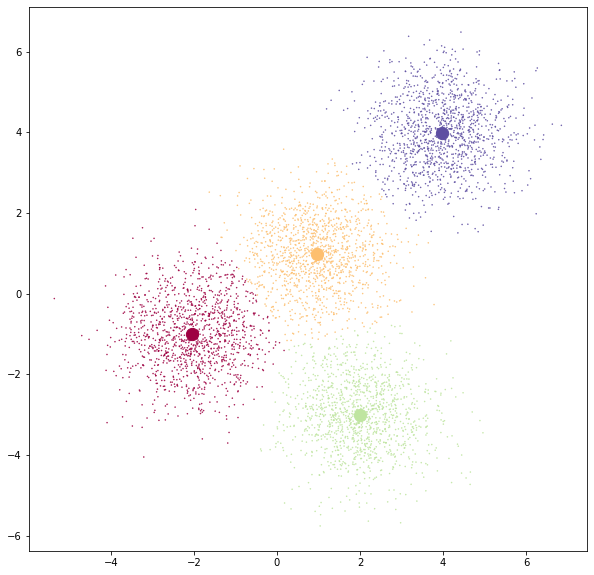

In [0]:
plt.gcf().set_size_inches(10, 10)
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    #Se creaza o masca in care toata punctele care apartin centroidului k sunt true iar restul false
    my_members = (k_means_labels == k)
    print(my_members)

    #Se extrag coordonatele centroidului k
    cluster_center = k_means_cluster_centers[k]
    col = np.reshape(col, (1, len(col)))
    print(col.shape)
    col = np.tile(col, (np.sum(my_members), 1))
    print(col.shape)

    #Se afiseaza punctele din clusterul k
    #Argumentul c este o matrice in care vectorul col (un triplet RGB) este repetat un numar de ori
    #egal cu numarul de puncte din cluster. Cu alte cuvinte, se asigneaza fiecarui punct din clasa 
    #aceeasi culoare col
    plt.scatter(X[my_members, 0], X[my_members, 1], marker='.', c=col, s=1)

    #Centroidul se afiseaza folosind un marker diferit si o dimensiune mai mare
    plt.scatter(cluster_center[0], cluster_center[1], marker='o', c=col[0], s=150, alpha=1)


    

Mai sus, in functia *scatter* argumentul **s** reprezinta suprafata punctului plotat iar argumentul **alpha** reprezinta gradul de transparenta (setarea acestui argumentul pe 1 afiseaza cercurile complet)

**TODO:** Experimenati algoritmul k-means cu diversi parametrii (numar de custere, metoda de initializare, etc). 

##Reducerea numarul de culori folosind algoritmul k-means
Algoritmul k-means poate fi folosit in reducerea numarului de culori privind spatiul RGB ca un spatiu tridimensional si fiecare culoare ca un punct in acest spatiu. Algoritmul determina $n$ clustere in acest spatiu urmand apoi a fi inlocuita fiecare culoare cu centroidul clusterului de care apartine. Concret, pasii sunt urmatorii:

1.   Citirea imaginii si crearea unei matrici cu toate culorile care apar in aceasta. Matricea o sa aiba forma de $Nx3$, unde $N$ reprezinta numarul de pixeli.
2.   Aplicarea algoritmului k-means pentru setul (matricea) construit anterior.
3.   Inlocuirea fiecarei culori din imagine cu centroidul clusterului de care apartine.

Cate culori va avea imaginea finala?




Pentru test se va folosi imaginea peppers.bmp din repository-ul de lucru.

In [18]:
!curl -o peppers.bmp https://raw.githubusercontent.com/miiip/MultimediaLabs/master/peppers.bmp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  768k  100  768k    0     0  2568k      0 --:--:-- --:--:-- --:--:-- 2577k


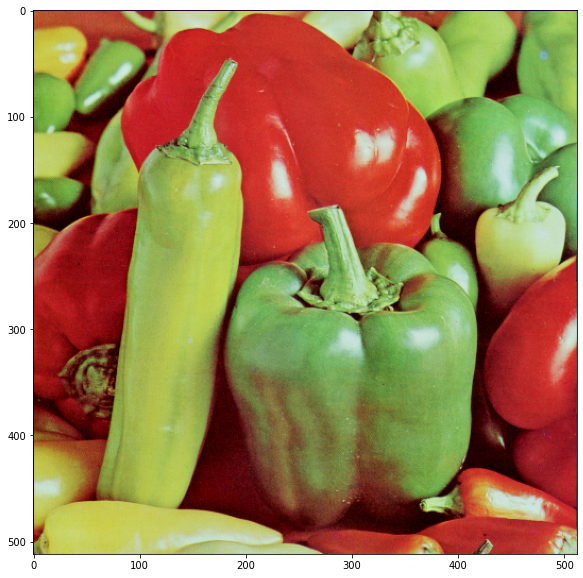

In [19]:
plt.gcf().set_size_inches(10, 10)
img = cv2.imread('peppers.bmp', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Vizualizarea spatiului culorilor (dupa cum s-a procedat si in laboratorul trecut)

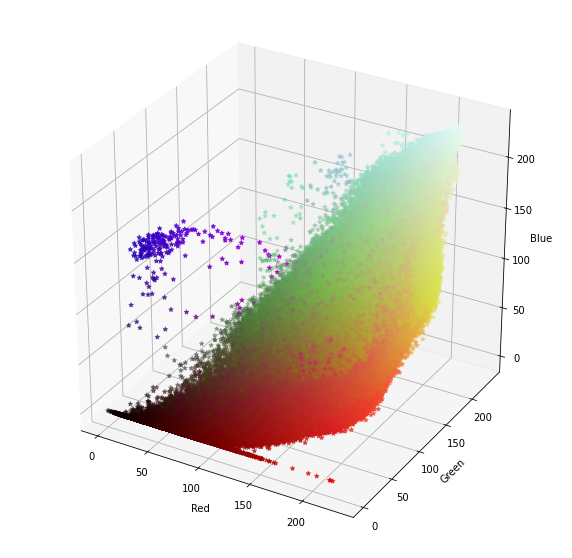

In [20]:
imgP = img.copy()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
r, g, b = cv2.split(imgP)
peppers_colors = imgP.reshape((np.shape(imgP)[0]*np.shape(imgP)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(peppers_colors)
peppers_colors = norm(peppers_colors).tolist()
ax.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=peppers_colors, marker="*")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()

Crearea setului de culori:

In [21]:
print(img.shape)
numOfPixels = img.shape[0]*img.shape[1]
X = np.reshape(img, (numOfPixels, 3))
print(X.shape)

(512, 512, 3)
(262144, 3)


Codul de mai jos este asemanator cu cel folosit in introducere, diferenta constand in faptul ca de data aceasta exista o interpretare aplicata a parametrilor:


*   Matricea X nu mai este o matrice generata random ci reprezinta multimea culorilor dintr-o imagine
*   Numarul de clustere furnizat prin paramterul n_clusters reprezinta numarul de culori din imaginea finala
*   Culoarea $i$ din matricea de intrare va fi inlocuita in imaginea finala cu k_means_cluster_centers[k_means_labels[i]]




In [0]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = np.uint8(k_means.cluster_centers_)

Inlocuirea culorilor din matricea X cu cele definite de centroizii determinati:

In [23]:
print(X.shape)
reducedX = np.asanyarray([k_means_cluster_centers[k_means_labels[i]] for i in range(numOfPixels)])

(262144, 3)


In [24]:
print(reducedX.shape)

(262144, 3)


Pentru a obtine imaginea cu numarul redus de culori, matricea reducedX se va remodela dupa dimensiunile imaginii:

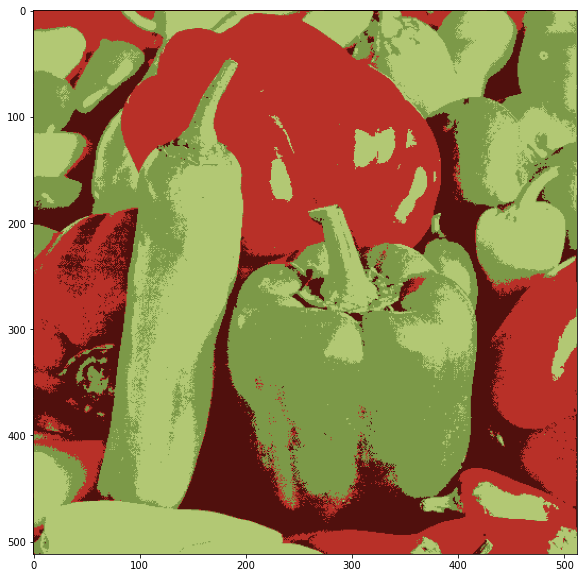

In [25]:
plt.gcf().set_size_inches(10, 10)
imgR = np.reshape(reducedX, img.shape)
plt.imshow(imgR)

Imaginea originala si cea modificata sunt afisate mai jos.

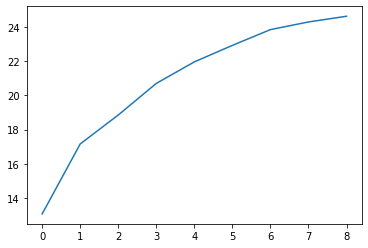

In [33]:
numOfPixels = img.shape[0]*img.shape[1]
X = np.reshape(img, (numOfPixels, 3))
list = []
for i in range(1,10):
  k_means = KMeans(init = "k-means++", n_clusters = i, n_init = 12)
  k_means.fit(X)
  k_means_labels = k_means.labels_
  k_means_cluster_centers = np.uint8(k_means.cluster_centers_)
  reducedX = np.asanyarray([k_means_cluster_centers[k_means_labels[i]] for i in range(numOfPixels)])
  imgR = np.reshape(reducedX, img.shape)
  list.append(cv2.PSNR(img,imgR))
plt.plot(list)
plt.show()

**TODO:** Plotati grafic PSNR dintre imaginea originala si cea modificata in functie de numarul de culori ales.

##Clasificarea cifrelor scrise de mana folosind k-means
Clasificarea in general este o problema de invatare supervizata. In aceasta parte a laboratorului se va experimenta aplicabilitatea algoritmului k-means, algoritm de invatare **nesupervizata** in problema recunoasterii cifrelor scrise de mana. 


Ca in orice problema de ML, este necesara existenta unui set de date de antrenare (in prima parte setul de date de antrenare a fost matricea de puncte generate random iar in a doua parte setul de date de antrenare a fost reprezentat de multimea culorilor unei imagini). Pentru a obtine acest set de date, este necesara instalarea unui pachet numit tensorflow_datasets. Mai multe despre tensorflow in laboratoarele viitoare. 

In [0]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (2.0.0)


Pentru aceasta aplicatie se va folosi celebrul set de date [MNIST](http://yann.lecun.com/exdb/mnist/) . Setul dispune de 70000 de imagini in tonuri de gri reprezentand cifre scrise de mana. Din cele 70000 de imagini, 60000 sunt folosite pentru antrenare si 10000 pentru testarea modelului (pentru a determina daca algoritmul este performant sau nu). Fiecare imagine are dimensiunea de 28x28. O parte din aceasta baza de date este afisata mai jos.

![MNIST dataset](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Mai multe detalii despre aceasta baza de date din pachetul tensorflow_dataset aveti [aici](https://www.tensorflow.org/datasets/catalog/mnist).

Pentru a accesa baza de date se foloseste functia *load* ca in exemplul de mai jos:

In [0]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


dataset reprezinta intregul set de date a carui dimensiune este 70000. In continuare se vor extrage in doua variabile diferite setul de date de antrenare si setul de date de testare:

In [0]:
train_dataset, test_dataset = dataset['train'], dataset['test']

Detalii despre aceste doua multimi se gasesc in variabila *metadata* returnata anterior de functia *load*.

In [0]:
print('Lungimea setul de antrenare este ', metadata.splits['train'].num_examples)
print('Lungimea setul de antrenare este ', metadata.splits['test'].num_examples)

Lungimea setul de antrenare este  60000
Lungimea setul de antrenare este  10000


Pentru a recupera imaginile (ca matrici de 28x28) din baza de date se foloseste functia *take* ca in exemplul de mai jos unde au fost afisate 5 imagini din baza de date:

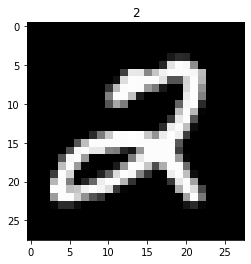

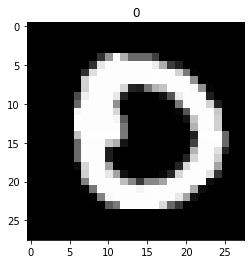

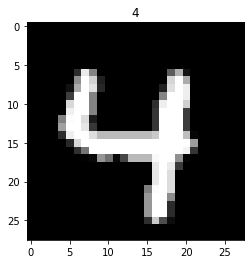

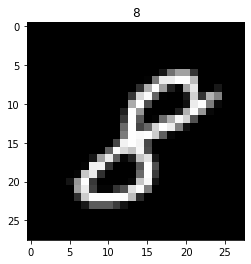

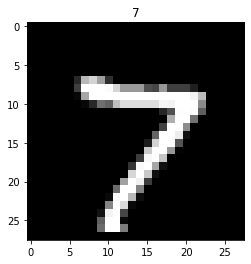

In [0]:
for image, label in test_dataset.take(5):
  imgNum = np.reshape(image.numpy(), (28,28))
  plt.title(str(label.numpy()))
  plt.imshow(imgNum, cmap='gray')
  plt.show()

Dupa cum ati intuit, *image* reprezinta imaginea in sine si *label* reprezinta eticheta acesteia (e.g. 2 daca imaginea reprezinta cifra 2). Functia *numpy()* aplicata obiectelor *image* si *label* returneaza continutul acestor obiecte ca si array-uri care se pot manipula prin libraria numpy.

Ideea algoritmului de clasificare este urmatoarea:


1.   Se interpreteaza fiecare imagine ca un punct intr-un spatiu cu 784 ($28^2$) dimensiuni. Se creaza o mutime de 60000 de puncte (fiecare punct reprezinta valorile pixelilor pentru o imagine). Notam aceasta multime de cu X.
2.   Se aplica k-means pe multimea punctelor determinata anterior.
3.   Se reia pasul 1 pentru multimea de test. Se creaza o multime de 10000 de puncte notata cu X_test.
4.   Se apeleaza functia *predict* a obiectului de tip KMeans pentru a determina clusterul aferent fiecarui punct de test.
5.   Se contorizeaza in cate dintre situatii clusterul determinat anterior corespunde label-ului punctului (imaginii) de test.


**Atentie!** Label-ul determinat de k-means reprezinta numarul cluster-ului la care a fost asignat un punct ci **NU** label-ul din baza de date (cel care identifica ce cifra reprezinta imaginea respectiva). Pentru a clasifica imaginile de test trebuie creata o corespondenta intre label-urile returnate de k-means si cele din baza de date.




Observatie: X reprezinta o matrice de 60000x784 si X_test o matrice de 10000x784. Randurile din aceste matrici reprezinta imagini in tonuri de gri ale unor cifre scrise de mana.

**TODO:** Sa se creeze matricile X si X_test precum si vectorul de etichete (labels) pentru ambele tipuri de puncte. 

In [0]:
factor = 10
num_training = metadata.splits['train'].num_examples //factor
num_testing = metadata.splits['test'].num_examples // factor
X = np.zeros((num_training, 784))
labelTraining = np.zeros((num_training, 1))
X_test = np.zeros((num_testing, 784))
labelTest = np.zeros((num_testing, 1))
i = 0
for image, label in train_dataset.take(num_training):
  imgNum = np.reshape(image.numpy(), (28,28))
  #imgNum = cv2.resize(imgNum, (8,8))
  X[i, :] = imgNum.flatten()
  labelNum = label.numpy()
  labelTraining[i] = labelNum
  i = i + 1
i = 0
for image, label in test_dataset.take(num_testing):
  imgNum = np.reshape(image.numpy(), (28,28))
  #imgNum = cv2.resize(imgNum, (8,8))
  X_test[i, :] = imgNum.flatten()
  labelNum = label.numpy()
  labelTest[i] = labelNum
  i = i + 1
labelTest = np.uint8(labelTest.flatten())
labelTraining = np.uint8(labelTraining.flatten())

Urmatorul pas al algoritmului este instantierea unui obiect de tip KMeans si antrenarea algoritmului. Cu alte cuvinte, se va aplica k-means pe matricea de X.

**TODO:** Implemenatati acest pas. Extrageti label-urile fiecarui punct. Cum setati numarul de clustere?

In [0]:
n_clusters = 128
k_means = KMeans(init = "k-means++", n_clusters = n_clusters, n_init = 8)
k_means.fit(X)
k_means_labels = k_means.labels_
print(k_means_labels)

[86 78 19 ... 81 29 82]


Pentru a clasifica pozele din setul de testare cu etichitele reale (ce indica cifra descrisa in imagine) se va crea un vector k_means_map care va face legatura dintre label-urile k-means si cele din baza de date. k_means_map[i] reprezinta eticheta reala din baza de date asignata etichetei $i$ returnata de algoritm. Pentru a compune acest vector, se parcurge lista de etichete returnata de k-means si pentru fiecare dintre acestea se va determina un vector de frecventa cu etichete reale. De exemplu, pentru eticheta k-means 7 si vectorul de frecventa [ 0 48  2  3  1  0  0  0  1  1] inseamna ca 48 de puncte de test asignate cluster-ului 7 reprezinta cifra 1, 3 dintre acestea reprezinta cifra 3, 1 reprezinta cifra 9 etc. Dupa cum intuiti, un anumit cluster nu poate fi mapat spre mai multe etichete reale. 

**TODO:** Propuneti o rezolvare a acestei probleme si implemenatati ideea de mai sus.

In [0]:
k_means_map = np.uint8(np.zeros(n_clusters))
for k_means_index in range(n_clusters):
  freq = np.uint32(np.zeros(10))
  for i in range(num_training):
    if  k_means_labels[i] == k_means_index:
      freq[labelTraining[i]] = freq[labelTraining[i]] + 1
  k_means_map[k_means_index] = (np.where(freq == np.amax(freq))[0][0])
  print(freq)

print(k_means_map)


[ 0  0  0  0 20  2  0  0  0 53]
[ 0 36  0  0  0  0  0  0  1  0]
[11  0  0  0  0  4 13  0 21  0]
[ 0  0  0  6  0  0  0  0 35  0]
[36  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0  0  0 65  0  2]
[ 0 89  0  0  0  0  1  0  0  0]
[ 1  0  0  0  0  0 42  0  0  0]
[ 0  0  0  0 39  0  0  0  0  3]
[ 0  0  1  0  9  2  1  1  3 36]
[ 0 77  1  0  1  0  0  0  0  0]
[ 1  0 33  2  0  0  0  0  0  0]
[25  0  0  0  0  0  0  0  0  0]
[ 2  0  4 44  0  4  0  0  1  1]
[ 0  0  0  0 42  0  0  0  1  0]
[ 0  0  0  1  0  0  0 62  0  0]
[ 0  0  0  6  0 24  0  0  8  0]
[ 0  0  0  0  0 49  1  0  0  0]
[  0 113   0   0   0   0   0   0   0   0]
[64  0  1  0  0  0  2  0  0  0]
[ 0  0  0  0  0  0  0 53  0  1]
[ 0  0  2  0  0  0  0  0 58  1]
[ 0  0  0 52  0  1  0  0  1  0]
[ 0  0 41  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0 18  0  0  0]
[ 0  0  0  0 33  1  0  0  0 28]
[ 0  0  0  0  0  0 40  0  0  0]
[ 0  0 39  0  0  0  0  0  1  0]
[ 0  2 50  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0 59  0  3]
[ 0 71  0  0  0  0  0  2  0  0

Folosind functia *predict* se determina clusterele (label-urile) pentru fiecare imagine (punct) din multimea de test ca in exemplul de mai jos.

In [0]:
k_means_labels_predicted = k_means.predict(X_test)

print(k_means_labels_predicted)

[118  68  46  21  20 102  56   2  82  78  62 119   5  33  21  49  34  13
 127  19 120  26  92 104 108  71  65 120  50 101  52  22  44  37  63   8
  11  34 105  55  81  88 101  89   8  28  64 119  51  69 104   5  73  52
  52  32  58  44  21  24  98  77  34 127  97  32  44  18 126 114 127 105
  81  95   6  65 117  53  41  36  31 120  77  14  61  83  20 106  93  57
  39  68  70  18  90  73  34   9  18  91 122  68  29  50  96  14 103  58
   6 103  54 110 111  30 104  96  98  42  57  77 101  32  59  25  22 106
  64  22 110   3  95  66  72  23  84  34  30  70  97  46   3  89  23 109
  83 122  69  41  56 114  76   5 116  67 101   8  32  52  66  83  28  21
  26  38 101  42  96  23 127  57 113  71 113  21  29 124  10 112 103  34
  78  28  72  10   0  55  36  33  66  59  67  40  72  73   5  73  39  13
  30  97 108  48 126  50 102  39 105   0  64  36 113  56  10   4 101 127
  52   1  40  11 108  94 105  24 115 124  54 112  50   8 112 125  70  40
   5  63 108  51  52  62  48   3 124  18  61   6   

O masura a eficienteti algoritmului consta in numararea cazurilor de test unde cifra asignata de algoritm este cea reala identificata de eticheta din labelTraining. Pentru aceasta vom compara k_means_map[k_means_labels_predicted[i]] cu labelTest[i].

In [0]:
#for i in range(len(labelTest)):
#  print(k_means_map[k_means_labels_predicted[i]], labelTest[i])
xx = [i for i in range(len(labelTest)) if k_means_map[k_means_labels_predicted[i]]==labelTest[i]]
print(100*len(xx)/num_testing)

86.1


**TODO:** Scimbati numarul de clustere. Care este legatura dintre numarul de clustere si eficienta algoritmului?